# Online Status Count Analysis

## Preparation

The following two scripts are activated to:
1. Set up the MongoDB connection and
2. Read the pre-generated ID-table to fetch names of roles and channels.

In [1]:
%run -i scripts/setup-mongo.py
%run -i scripts/read-idtable.py

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

plt.rcParams['figure.figsize'] = (18,8)

In [3]:
# Get messages collection
coll_status = mongo_db['status']

## Status Counts over Time

First of all, we prepare a method to fetch data and generate a plot of all online states of the specified count of last days.

In [4]:
def status_plot_last_x_days(days):
    status_data = coll_status.find({
        'timestamp': {
            '$gte': datetime.today() - timedelta(days=days)
        }
    })
    
    online = []
    offline = []
    dnd = []
    away = []
    dates = []
    
    i = 0
    for s in status_data.clone():
        i += 1
        # Only take every 2nd value
        if i % 2 == 0:
            continue
        
        # Some of the offline values are errous and
        # value to 0, so this filters these values
        # out for a cleaner result.
        offl = s.get('offline')
        if offl == 0:
            offl = offline[-1]
        offline.append(offl)
        
        online.append(s.get('online'))
        dnd.append(s.get('dnd'))
        away.append(s.get('away'))
        dates.append(s.get('timestamp'))
        
        
    fig = plt.figure()
    
    a1 = fig.add_axes([0, 0, 1, 1])
    a1.plot(dates, online, 'g')
    a1.plot(dates, dnd, 'r')
    a1.plot(dates, away, 'y')
#   a2 = a1.twinx()
#   a2.plot(dates, offline, 'b')
    plt.show()

So, this is the evolution of player counts for each online status (`online`, `dnd`, `away`) over the last 30 days.

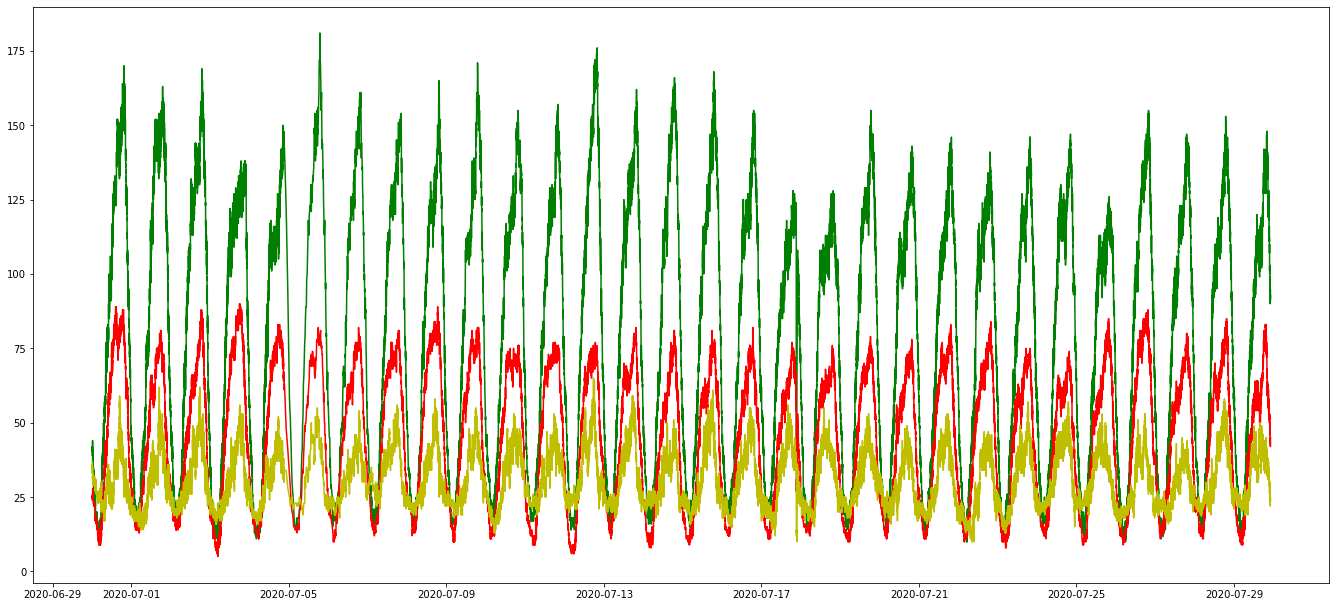

In [5]:
status_plot_last_x_days(30)

And this is a more detailed view over the last 7 days.

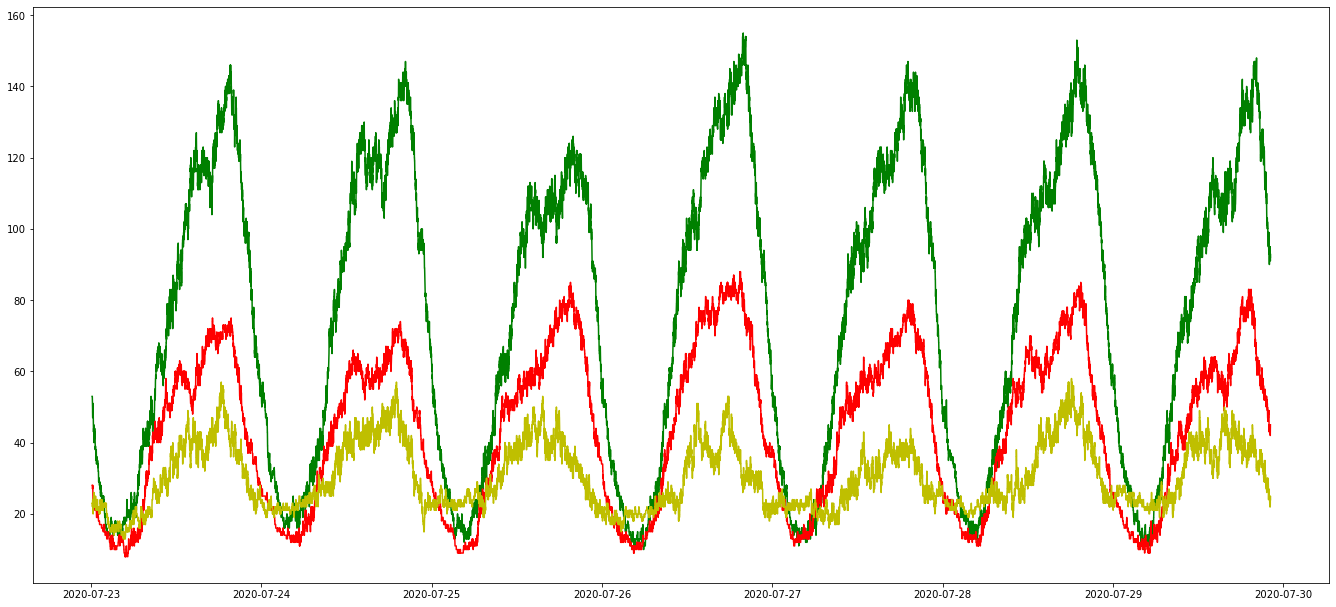

In [6]:
status_plot_last_x_days(7)

## Average Count of Online Users over Time

In the following chart you see the evolution of online users for each status averaged over the time span of a day over time.

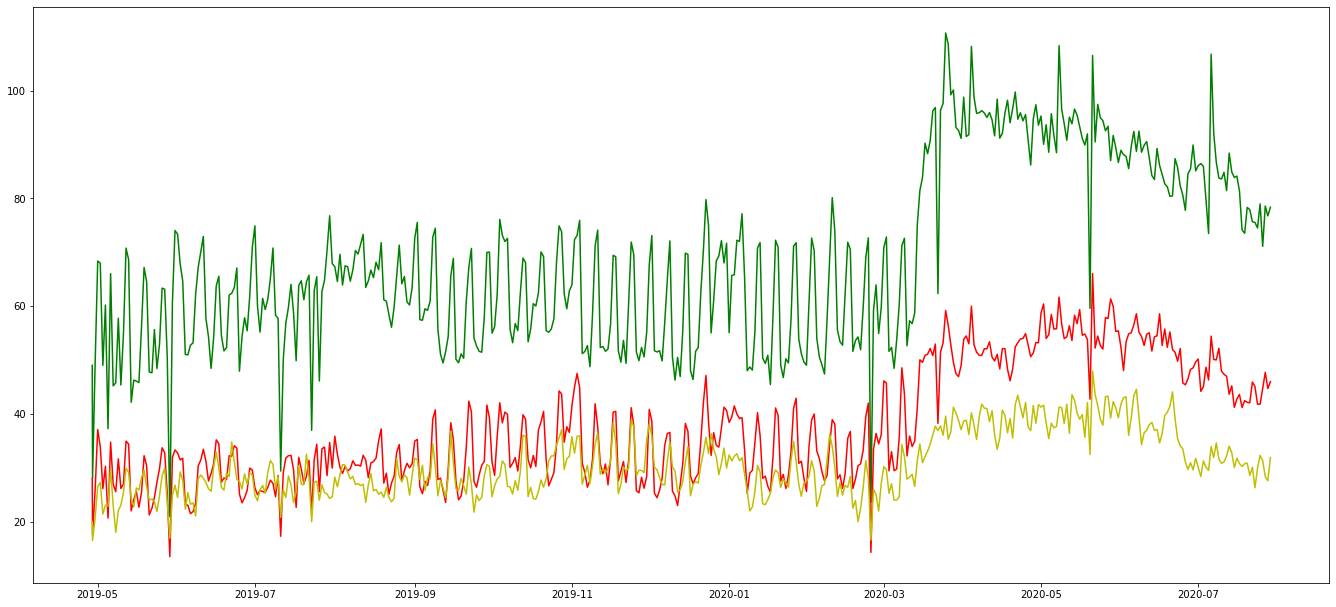

In [7]:
status_data = coll_status.find({})

online = []
offline = []
dnd = []
away = []
dates = []

c_online = 0
c_offline = 0
c_dnd = 0
c_away = 0

last_day = 1
i = 0
for s in status_data.clone():
    date = s.get('timestamp')
    c_online += s.get('online')
    c_offline += s.get('offline')
    c_dnd += s.get('dnd')
    c_away += s.get('away')
    i += 1
    if last_day != date.day:
        last_day = date.day
        online.append(c_online / i)
        offline.append(c_offline / i)
        dnd.append(c_dnd / i)
        away.append(c_away / i)
        dates.append(date)
        c_online = 0
        c_offline = 0
        c_dnd = 0
        c_away = 0
        i = 0
        
fig = plt.figure()
    
plt.rcParams['figure.figsize'] = (18,8)
a1 = fig.add_axes([0, 0, 1, 1])
a1.plot(dates, online, 'g')
a1.plot(dates, dnd, 'r')
a1.plot(dates, away, 'y')
# a2 = a1.twinx()
# a2.plot(dates, offline, 'b')
plt.show()